In [1]:
import torchvision
from PIL import Image

import pandas as pd
import numpy as np
import scipy as sp
from scipy import ndimage
from scipy.stats import norm
import scipy.signal as sig

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from skimage import io
from skimage.feature import hog
from sklearn.svm import SVC

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

# **Downloading of Data Set**

In [3]:
# download the Fashion MNIST training data
train_dataset = torchvision.datasets.FashionMNIST(root='./', train=True, download=True)

# download the Fashion MNIST evaluation data
eval_dataset = torchvision.datasets.FashionMNIST(root='./', train=False, download=True)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!





In [0]:
labels_dict = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

#**Checking Data**

In [5]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [6]:
eval_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test

Label 9 Ankle boot


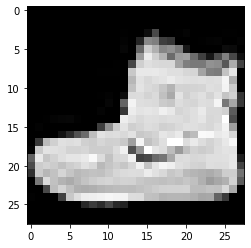

In [7]:
image_1, label_1 = train_dataset[0]
imshow(np.asarray(image_1),cmap='gray')
print("Label",label_1,labels_dict[label_1])

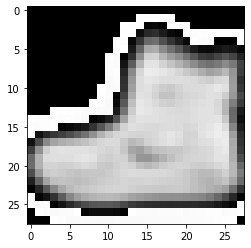

In [8]:
blurred_f = ndimage.gaussian_filter(image_1, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

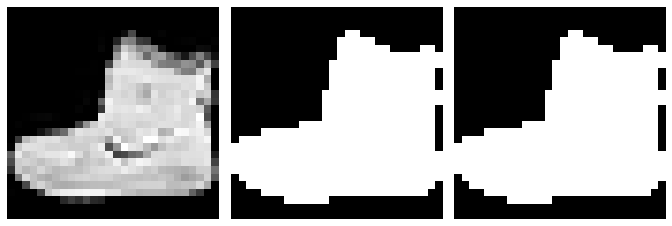

In [9]:
open_square = ndimage.binary_opening(image_1)

eroded_square = ndimage.binary_erosion(image_1)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_1)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_1, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

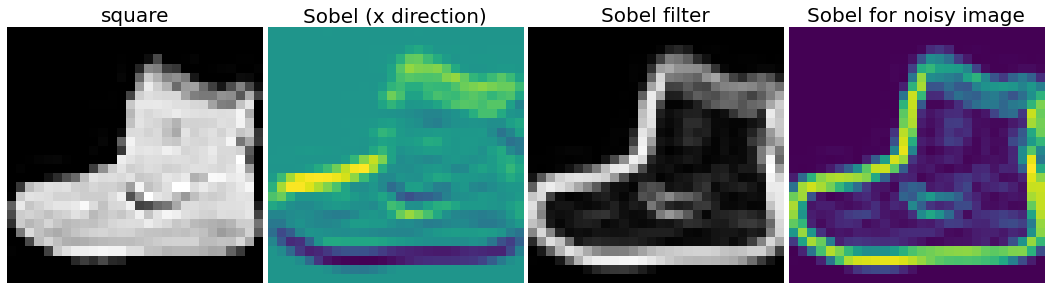

In [11]:
sx = ndimage.sobel(image_1, axis=0, mode='constant')
sy = ndimage.sobel(image_1, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_1, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob, cmap='gray')
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_1 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_1, axis=0, mode='constant')
sy = ndimage.sobel(image_1, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

Testing Sharpened + Sobel filter

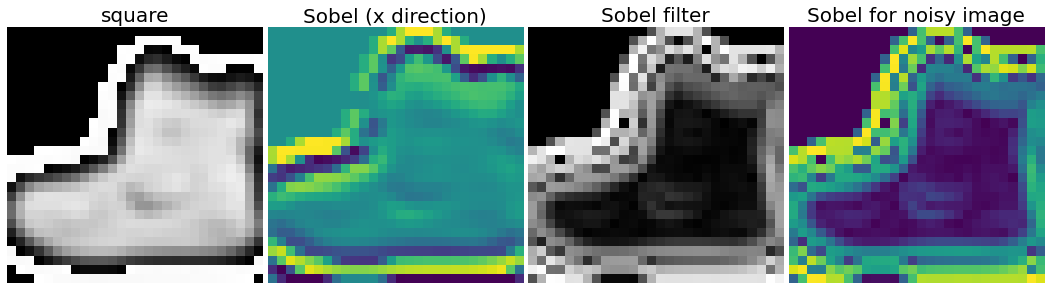

In [12]:
sharpened_test = sharpened.astype('float')

sx = ndimage.sobel(sharpened_test, axis=0, mode='constant')
sy = ndimage.sobel(sharpened_test, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(sharpened_test, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob, cmap='gray')
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

sharpened_test += 0.07*np.random.random((28,28))

sx = ndimage.sobel(sharpened_test, axis=0, mode='constant')
sy = ndimage.sobel(sharpened_test, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

Label 8 Bag


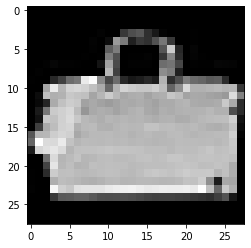

In [13]:
image_2, label_2 = train_dataset[99]
imshow(np.asarray(image_2),cmap='gray')
print("Label",label_2,labels_dict[label_2])

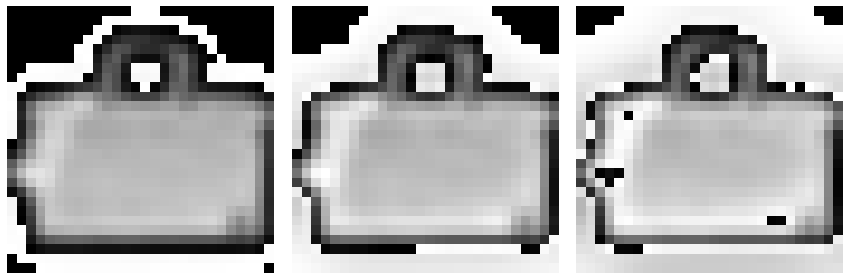

In [14]:
blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened_1 = blurred_f + alpha * (blurred_f - filter_blurred_f)

blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 2)
alpha = 1
sharpened_2 = blurred_f + alpha * (blurred_f - filter_blurred_f)

blurred_f = ndimage.gaussian_filter(image_2, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 3)
alpha = 1
sharpened_3 = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(sharpened_1, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(sharpened_2, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened_3, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

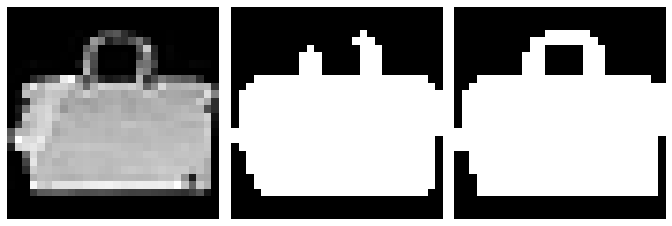

In [15]:
open_square = ndimage.binary_opening(image_2)

eroded_square = ndimage.binary_erosion(image_2)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_2)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_2, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

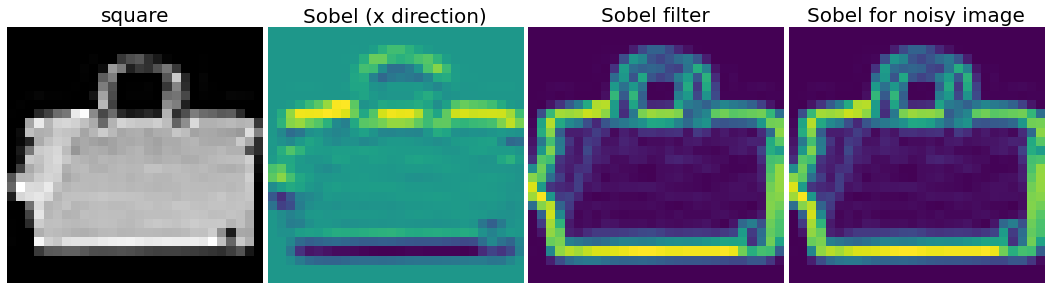

In [17]:
sx = ndimage.sobel(image_2, axis=0, mode='constant')
sy = ndimage.sobel(image_2, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_2 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_2, axis=0, mode='constant')
sy = ndimage.sobel(image_2, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

Label 6 Shirt


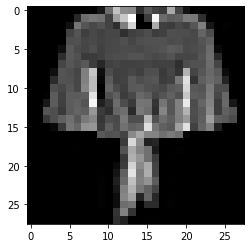

In [18]:
image_3, label_3 = train_dataset[402]
imshow(np.asarray(image_3),cmap='gray')
print("Label",label_3,labels_dict[label_3])

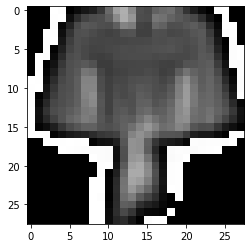

In [19]:
blurred_f = ndimage.gaussian_filter(image_3, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

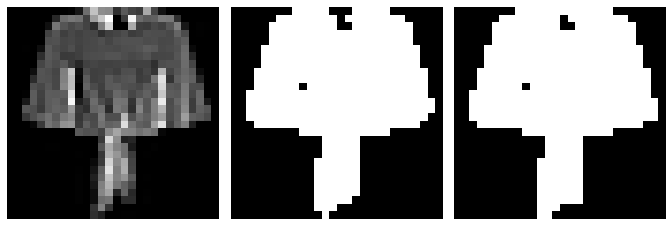

In [20]:
open_square = ndimage.binary_opening(image_3)

eroded_square = ndimage.binary_erosion(image_3)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_3)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_3, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

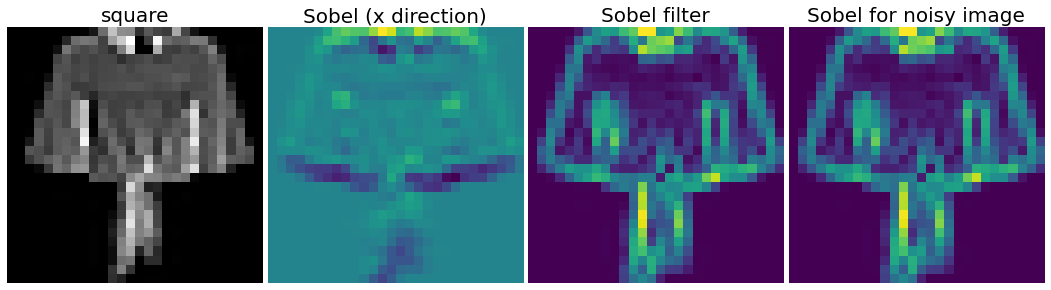

In [22]:
sx = ndimage.sobel(image_3, axis=0, mode='constant')
sy = ndimage.sobel(image_3, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_3, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_3 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_3, axis=0, mode='constant')
sy = ndimage.sobel(image_3, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

Label 2 Pullover


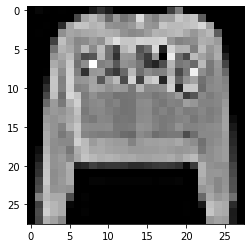

In [23]:
image_4, label_4 = train_dataset[20432]
imshow(np.asarray(image_4),cmap='gray')
print("Label",label_4,labels_dict[label_4])

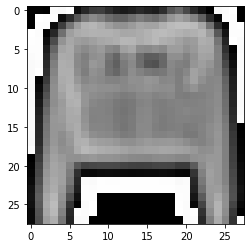

In [24]:
blurred_f = ndimage.gaussian_filter(image_4, 1)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
# imshow(blurred_f,cmap='gray')
# imshow(filter_blurred_f,cmap='gray')
imshow(sharpened,cmap='gray')

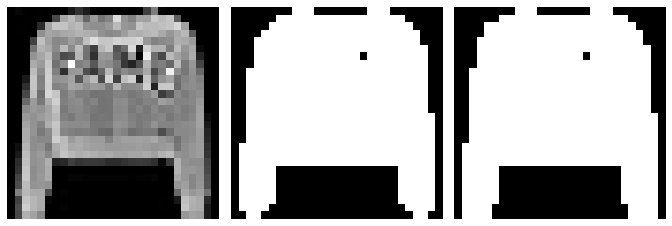

In [25]:
open_square = ndimage.binary_opening(image_4)

eroded_square = ndimage.binary_erosion(image_4)
reconstruction = ndimage.binary_propagation(eroded_square, mask=image_4)

plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(image_4, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

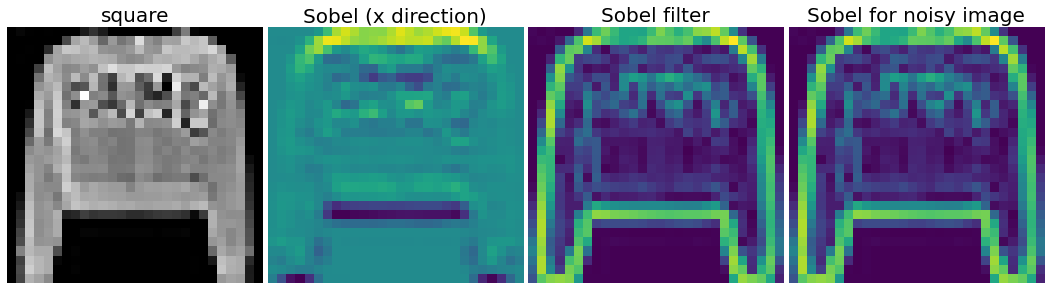

In [27]:
sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_4, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_4 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

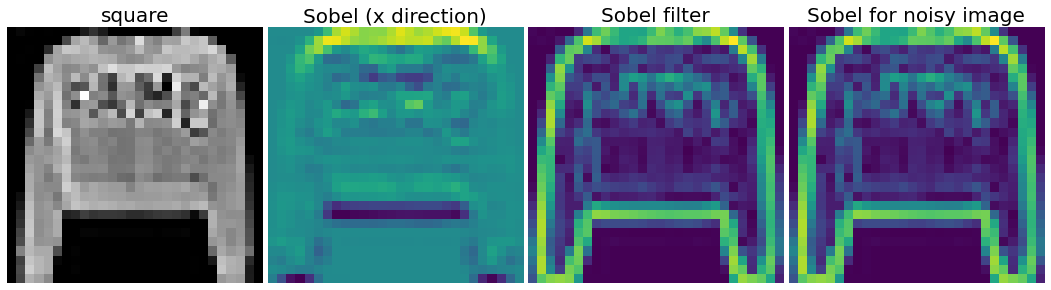

In [28]:
sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(image_4, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

image_4 += 0.07*np.random.random((28,28))

sx = ndimage.sobel(image_4, axis=0, mode='constant')
sy = ndimage.sobel(image_4, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

# **Preparing Data**
Creating Dataframes

In [0]:
train_images = train_dataset.data.numpy().reshape(-1,28*28)
train_labels = train_dataset.targets.data.numpy()

In [38]:
train_images.shape

(60000, 784)

In [31]:
train_labels.shape

(60000,)

In [0]:
train_labels_df = pd.DataFrame(train_labels,columns=["class"])

In [50]:
train_labels_df.head()

,class
0,9
1,0
2,0
3,3
4,0


In [0]:
eval_images = eval_dataset.data.numpy().reshape(-1,28*28)
eval_labels = eval_dataset.targets.data.numpy()

In [40]:
eval_images.shape

(10000, 784)

In [34]:
eval_labels.shape

(10000,)

In [0]:
eval_labels_df = pd.DataFrame(eval_labels,columns=["class"])

In [52]:
eval_labels_df.head()

,class
0,9
1,2
2,1
3,1
4,6


# **1. SVM with PCA**

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
standardized_train_images = StandardScaler().fit_transform(train_images)
#Test it with TSNE later
pca = PCA()
pca.n_components = 2
pca_train_images = pca.fit_transform(standardized_train_images)

standardized_eval_images = StandardScaler().fit_transform(eval_images)

pca = PCA()
pca.n_components = 2
pca_eval_images = pca.fit_transform(standardized_eval_images)

In [0]:
svm = SVC(kernel='linear', random_state=42)

In [0]:
pca_train_images_df = pd.DataFrame(pca_train_images,columns=("1st principal","2nd principal"))

In [55]:
svm.fit(pca_train_images,train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred_1 = svm.predict(pca_eval_images)

In [61]:
y_pred_1

array([7, 2, 1, ..., 0, 1, 5])

In [62]:
eval_labels

array([9, 2, 1, ..., 8, 1, 5])

In [63]:
print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(eval_labels, y_pred_1) * 100)))

Model classification accuracy: 51.370000000000005%
